In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np 

In [2]:
#import databases 

cases_path = "Resources/us.csv"


cases_df = pd.read_csv(cases_path)
cases_df.head()


,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [3]:
searches_path = "Resources/google-search-trends.csv"

searches_df = pd.read_csv(searches_path)

searches_df.head()

,date,location_key,search_trends_abdominal_obesity,search_trends_abdominal_pain,search_trends_acne,search_trends_actinic_keratosis,search_trends_acute_bronchitis,search_trends_adrenal_crisis,search_trends_ageusia,search_trends_alcoholism,...,search_trends_visual_acuity,search_trends_vomiting,search_trends_wart,search_trends_water_retention,search_trends_weakness,search_trends_weight_gain,search_trends_wheeze,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn
0,2020-01-01,AU,3.56,5.38,10.76,0.52,0.35,0.12,0.05,5.36,...,0.70,4.23,1.87,0.39,0.47,4.47,0.30,3.52,0.43,0.21
1,2020-01-02,AU,3.46,5.35,11.30,0.55,0.36,0.14,0.06,4.62,...,0.44,3.97,1.97,0.41,0.47,4.60,0.27,3.48,0.45,0.19
2,2020-01-03,AU,3.40,5.35,11.23,0.53,0.34,0.12,0.05,4.63,...,0.29,3.90,1.85,0.40,0.65,4.46,0.30,3.58,0.39,0.18
3,2020-01-04,AU,3.43,5.23,10.68,0.42,0.35,0.11,0.05,4.82,...,0.28,3.88,1.78,0.38,0.54,4.43,0.30,3.59,0.40,0.21
4,2020-01-05,AU,3.29,5.14,10.20,0.49,0.38,0.11,NaN,4.26,...,0.38,3.73,1.75,0.34,0.46,4.59,0.34,3.09,0.40,0.19


In [4]:
#Filter for US Data 

us_searches_df = searches_df.loc[searches_df['location_key'] == 'US']
us_searches_df.head()

,date,location_key,search_trends_abdominal_obesity,search_trends_abdominal_pain,search_trends_acne,search_trends_actinic_keratosis,search_trends_acute_bronchitis,search_trends_adrenal_crisis,search_trends_ageusia,search_trends_alcoholism,...,search_trends_visual_acuity,search_trends_vomiting,search_trends_wart,search_trends_water_retention,search_trends_weakness,search_trends_weight_gain,search_trends_wheeze,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn
12818,2020-01-01,US,2.42,4.71,8.63,0.26,0.83,0.09,0.05,5.78,...,0.47,4.00,1.23,0.23,0.32,3.13,0.34,2.65,0.36,0.17
12819,2020-01-02,US,2.40,4.66,9.16,0.31,0.93,0.09,0.05,4.80,...,0.33,3.46,1.33,0.25,0.37,3.36,0.33,2.60,0.39,0.16
12820,2020-01-03,US,2.13,4.54,8.75,0.29,0.91,0.10,0.05,4.51,...,0.29,3.28,1.29,0.24,0.36,3.17,0.32,2.46,0.38,0.16
12821,2020-01-04,US,2.30,4.60,9.16,0.25,0.86,0.09,0.05,4.54,...,0.24,3.26,1.24,0.24,0.34,3.15,0.31,2.71,0.38,0.17
12822,2020-01-05,US,2.53,4.59,9.31,0.26,0.81,0.09,0.05,4.31,...,0.23,3.22,1.25,0.24,0.34,3.38,0.31,2.81,0.38,0.17


In [5]:
#print columns to determine appropriate searches 

for columns in us_searches_df: 
    print(columns)

date
location_key
search_trends_abdominal_obesity
search_trends_abdominal_pain
search_trends_acne
search_trends_actinic_keratosis
search_trends_acute_bronchitis
search_trends_adrenal_crisis
search_trends_ageusia
search_trends_alcoholism
search_trends_allergic_conjunctivitis
search_trends_allergy
search_trends_amblyopia
search_trends_amenorrhea
search_trends_amnesia
search_trends_anal_fissure
search_trends_anaphylaxis
search_trends_anemia
search_trends_angina_pectoris
search_trends_angioedema
search_trends_angular_cheilitis
search_trends_anosmia
search_trends_anxiety
search_trends_aphasia
search_trends_aphonia
search_trends_apnea
search_trends_arthralgia
search_trends_arthritis
search_trends_ascites
search_trends_asperger_syndrome
search_trends_asphyxia
search_trends_asthma
search_trends_astigmatism
search_trends_ataxia
search_trends_atheroma
search_trends_attention_deficit_hyperactivity_disorder
search_trends_auditory_hallucination
search_trends_autoimmune_disease
search_trends_avoidan

In [7]:
#Filter data for Anxiety Symptoms 
symptoms_df = us_searches_df.filter(['date','search_trends_anxiety', 'search_trends_panic_attack','search_trends_depersonalization', 'search_trends_depression', 'search_trends_rumination', 'search_trends_hypersomnia', 'search_trends_mood_disorder' ], axis = 1).reset_index(drop = True)


In [44]:
cases_df['Change In Cases'] = cases_df['cases'] - cases_df['cases'].shift(1)
cases_df = cases_df.dropna()
cases_df.head()

,date,cases,deaths,Change In Cases
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0
5,2020-01-26,5,0,2.0
6,2020-01-27,5,0,0.0


In [21]:
#merge search trends df with cases df 
mental_df = pd.merge(cases_df,symptoms_df, on = 'date', how = 'outer')
#Data Cleaning: drop all rows with missing values 
mental_df = mental_df.dropna()



,date,cases,deaths,Change In Cases,search_trends_anxiety,search_trends_panic_attack,search_trends_depersonalization,search_trends_depression,search_trends_rumination,search_trends_hypersomnia,search_trends_mood_disorder
0,2020-01-22,1.0,0.0,0.0,8.02,1.54,0.08,4.92,0.15,0.10,1.18
1,2020-01-23,1.0,0.0,0.0,7.93,1.53,0.08,4.86,0.13,0.10,1.19
2,2020-01-24,2.0,0.0,1.0,7.23,1.44,0.07,4.42,0.10,0.08,1.05
3,2020-01-25,3.0,0.0,1.0,7.00,1.42,0.08,4.34,0.09,0.10,0.94
4,2020-01-26,5.0,0.0,2.0,7.23,1.46,0.08,4.56,0.10,0.09,0.95


In [22]:
#Data cleaning: Rename columns for easier readability 
mental_df = mental_df.rename(columns = {'date': "Date", 'cases': 'Cases', 'deaths': 'Deaths', 'Change In Cases': 'New Cases', 
                                       'search_trends_anxiety': 'Searches for Anxiety', 'search_trends_panic_attack' : 'Searches for Panic Attacks',
                                       'search_trends_depersonalization': 'Searches for Depersonalization', 'search_trends_depression': 'Searches for Depression',
                                       'search_trends_rumination': 'Searches for Rumination', 'search_trends_hypersomnia': 'Searches for Hypersomnia', 
                                       'search_trends_mood_disorder': 'Searches for Mood Disorders'})
mental_df.head()

,Date,Cases,Deaths,New Cases,Searches for Anxiety,Searches for Panic Attacks,Searches for Depersonalization,Searches for Depression,Searches for Rumination,Searches for Hypersomnia,Searches for Mood Disorders
0,2020-01-22,1.0,0.0,0.0,8.02,1.54,0.08,4.92,0.15,0.10,1.18
1,2020-01-23,1.0,0.0,0.0,7.93,1.53,0.08,4.86,0.13,0.10,1.19
2,2020-01-24,2.0,0.0,1.0,7.23,1.44,0.07,4.42,0.10,0.08,1.05
3,2020-01-25,3.0,0.0,1.0,7.00,1.42,0.08,4.34,0.09,0.10,0.94
4,2020-01-26,5.0,0.0,2.0,7.23,1.46,0.08,4.56,0.10,0.09,0.95


In [46]:
#Add new columns for month and year for further filtering 
mental_df['Year'] = pd.DatetimeIndex(mental_df['Date']).year
mental_df['Month'] = pd.DatetimeIndex(mental_df['Date']).month 

mental_df = mental_df [['Date', 'Month', 'Year', 'New Cases','Cases', 'Searches for Anxiety', 'Searches for Panic Attacks', 'Searches for Depersonalization', 'Searches for Depression', 'Searches for Rumination', 'Searches for Hypersomnia', 'Searches for Mood Disorders']]
mental_df.head()

,Date,Month,Year,New Cases,Cases,Searches for Anxiety,Searches for Panic Attacks,Searches for Depersonalization,Searches for Depression,Searches for Rumination,Searches for Hypersomnia,Searches for Mood Disorders
0,2020-01-22,1,2020,0.0,1.0,8.02,1.54,0.08,4.92,0.15,0.10,1.18
1,2020-01-23,1,2020,0.0,1.0,7.93,1.53,0.08,4.86,0.13,0.10,1.19
2,2020-01-24,1,2020,1.0,2.0,7.23,1.44,0.07,4.42,0.10,0.08,1.05
3,2020-01-25,1,2020,1.0,3.0,7.00,1.42,0.08,4.34,0.09,0.10,0.94
4,2020-01-26,1,2020,2.0,5.0,7.23,1.46,0.08,4.56,0.10,0.09,0.95


In [52]:
#Create Dataframes for 2020 and 2021 
mental_df_2020 = mental_df.loc[mental_df['Year'] == 2020]
mental_df_2021 = mental_df.loc[mental_df['Year'] == 2021]


<function matplotlib.pyplot.show(close=None, block=None)>

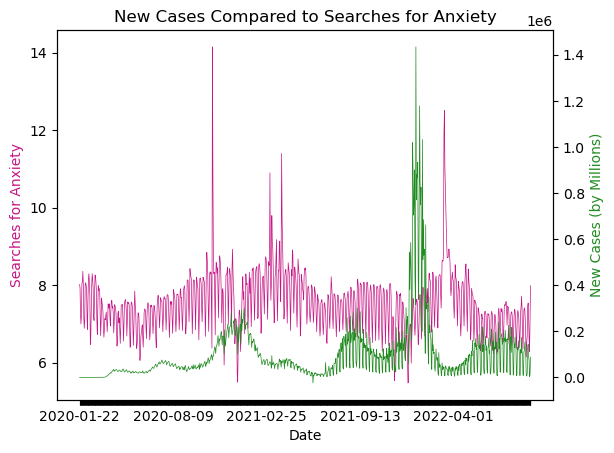

In [151]:
#Compare Searches for anxiety to new cases 
x_axis = mental_df['Date']
y_axisa = mental_df['Searches for Anxiety']
y_axisc = mental_df['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5,)

n = 200 # Keeps every 200th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Anxiety')


plt.savefig("Anxietygraph.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

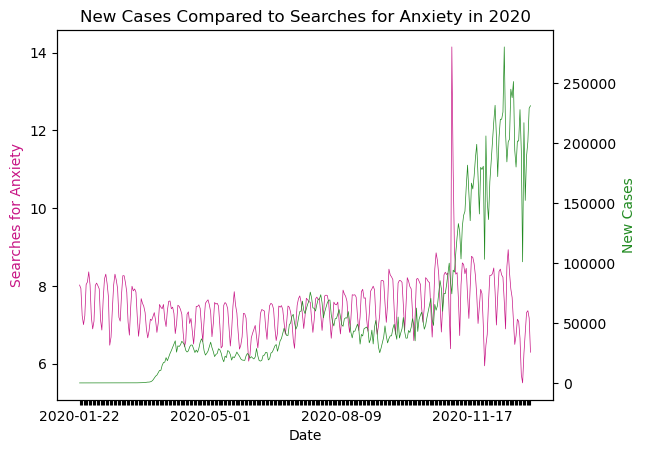

In [152]:
#Filter Graph for 2020 
x_axis = mental_df_2020['Date']
y_axisa = mental_df_2020['Searches for Anxiety']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)



n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]


ax.set_xlabel("Date",)
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Anxiety in 2020')
plt.savefig("Anxiety2020.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

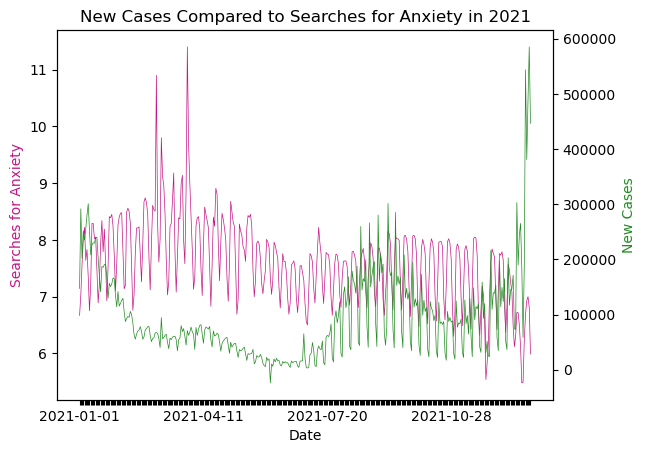

In [153]:
#Filter Graph for 2021 
x_axis = mental_df_2021['Date']
y_axisa = mental_df_2021['Searches for Anxiety']
y_axisc = mental_df_2021['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Anxiety in 2021')
plt.savefig("Anxiety2021.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

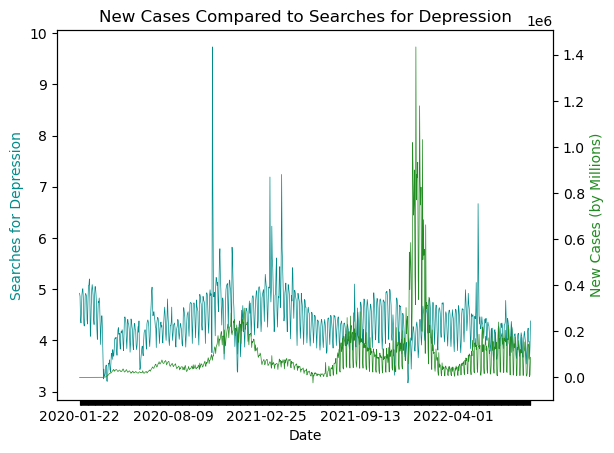

In [154]:
#Compare searches for depression to new covid cases 
x_axis = mental_df['Date']
y_axisd = mental_df['Searches for Depression']
y_axisc = mental_df['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkcyan', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 200
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Depression", color = 'darkcyan')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.savefig("Depressiongraph.jpg")
plt.title('New Cases Compared to Searches for Depression')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

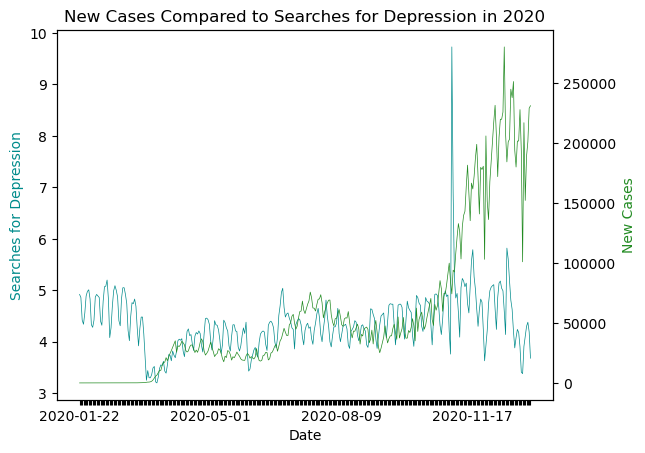

In [155]:
#Filter Depression Graph for 2020
x_axis = mental_df_2020['Date']
y_axisd = mental_df_2020['Searches for Depression']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkcyan', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Depression", color = 'darkcyan')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Depression in 2020')
plt.savefig("Depression2020.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

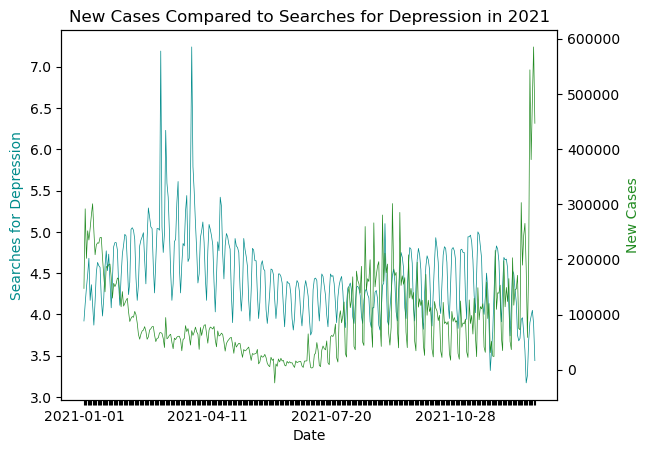

In [156]:
#Filter Depression Graph for 2021
x_axis = mental_df_2021['Date']
y_axisd = mental_df_2021['Searches for Depression']
y_axisc = mental_df_2021['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkcyan', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Depression", color = 'darkcyan')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Depression in 2021')
plt.savefig("Depression2021.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

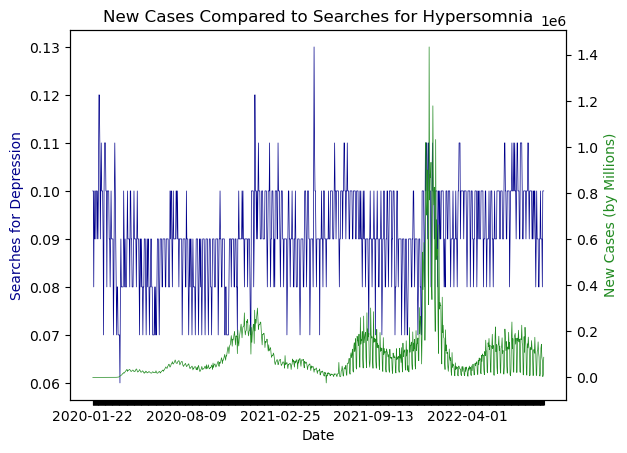

In [157]:
#Compare New Cases to Hypersomnia
x_axis = mental_df['Date']
y_axisd = mental_df['Searches for Hypersomnia']
y_axisc = mental_df['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkblue', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 200
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Depression", color = 'darkblue')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Hypersomnia')
plt.savefig("Hypersomniagraph.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

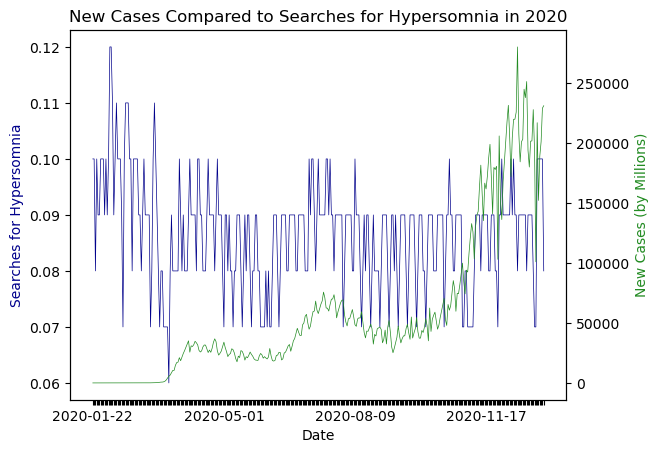

In [158]:
#Filter New Cases to Hypersomnia in 2020
x_axis = mental_df_2020['Date']
y_axisd = mental_df_2020['Searches for Hypersomnia']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkblue', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Hypersomnia", color = 'darkblue')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Hypersomnia in 2020')
plt.savefig("Hypersomnia2020.jpg")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

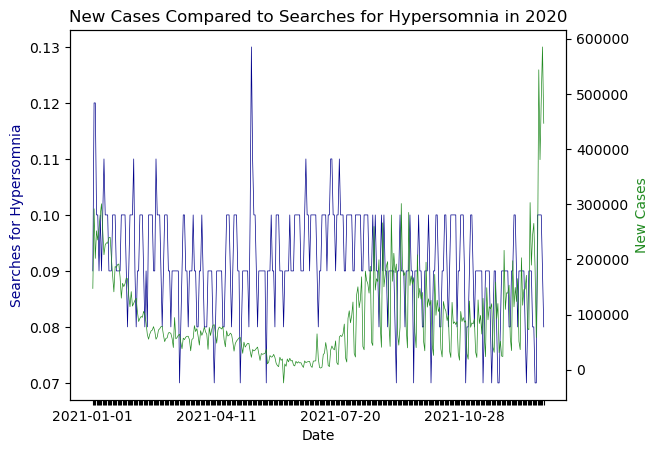

In [159]:
#Filter New Cases to Hypersomnia in 2020
x_axis = mental_df_2021['Date']
y_axisd = mental_df_2021['Searches for Hypersomnia']
y_axisc = mental_df_2021['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkblue', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Hypersomnia", color = 'darkblue')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Hypersomnia in 2020')
plt.savefig("Hypersomnia2021.jpg")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

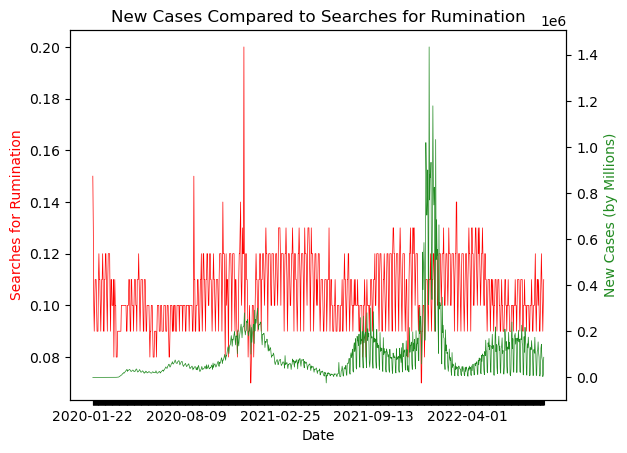

In [160]:
#Compare New Cases to Rumination
x_axis = mental_df['Date']
y_axisd = mental_df['Searches for Rumination']
y_axisc = mental_df['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 200 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Rumination", color = 'red')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Rumination')
plt.savefig("Ruminationgraph.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

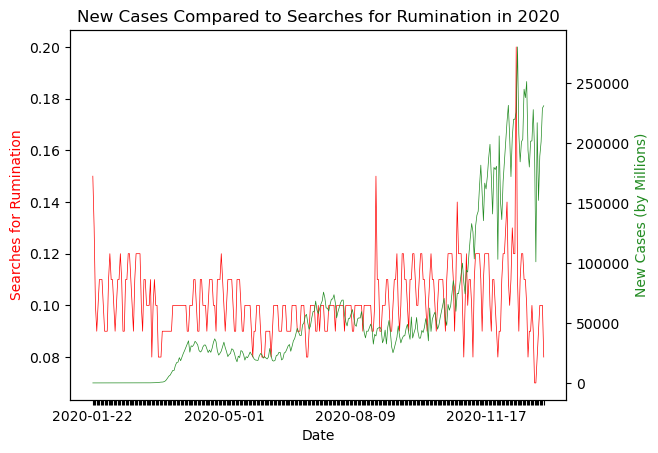

In [161]:
#Filter New Cases to Rumination in 2020
x_axis = mental_df_2020['Date']
y_axisd = mental_df_2020['Searches for Rumination']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Rumination", color = 'red')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Rumination in 2020')
plt.savefig("Rumination2020.jpg")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

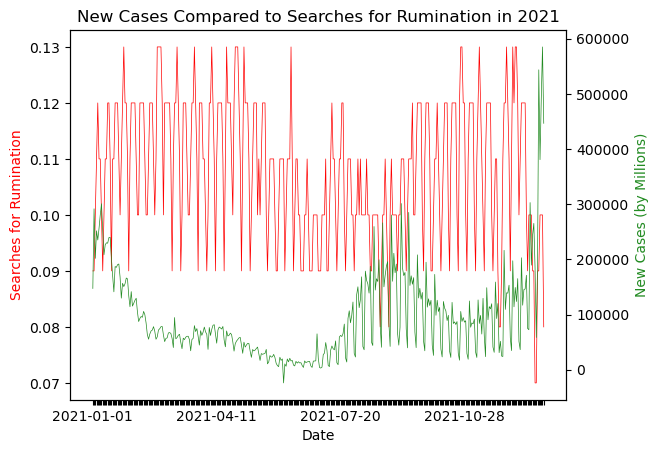

In [162]:
#Filter New Cases to Rumination in 2021
x_axis = mental_df_2021['Date']
y_axisd = mental_df_2021['Searches for Rumination']
y_axisc = mental_df_2021['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Rumination", color = 'red')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Rumination in 2021')
plt.savefig("Hypersomnia2021.jpg")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

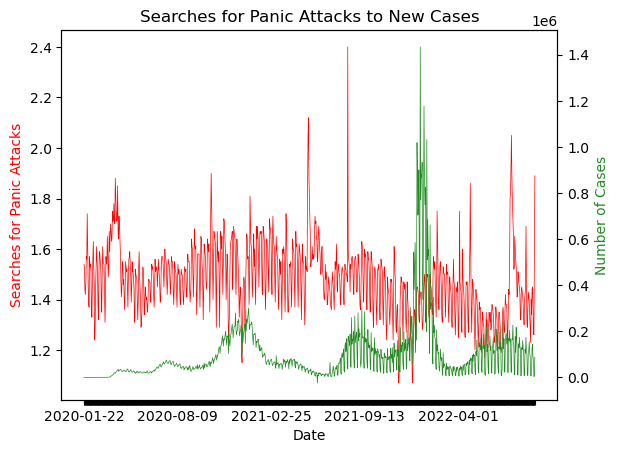

In [163]:
#Compare Searches for Panic attacks to new cases

x_axis = mental_df['Date']
y_axisa = mental_df['Searches for Panic Attacks']
y_axisc = mental_df['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 200
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]



ax.set_xlabel("Date")
ax.set_ylabel("Searches for Panic Attacks", color = 'red')
ax2.set_ylabel('Number of Cases', color = 'forestgreen')
plt.title('Searches for Panic Attacks to New Cases')
plt.savefig("panicgraph.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

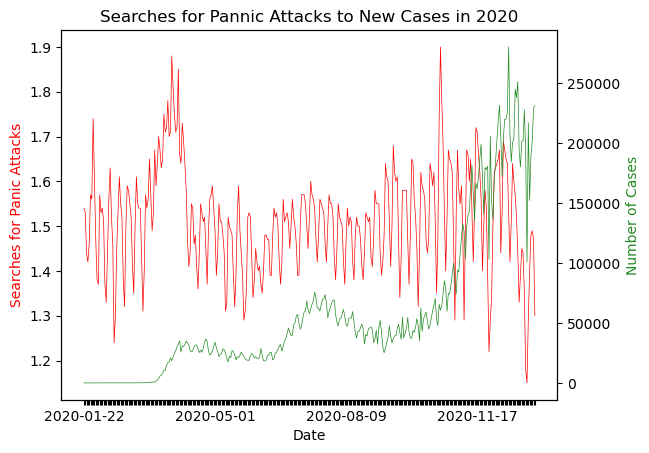

In [164]:
#filter searches for panic attacks to new cases in 2020
x_axis = mental_df_2020['Date']
y_axisa = mental_df_2020['Searches for Panic Attacks']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 100
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]



ax.set_xlabel("Date")
ax.set_ylabel("Searches for Panic Attacks", color = 'red')
ax2.set_ylabel('Number of Cases', color = 'forestgreen')
plt.title('Searches for Pannic Attacks to New Cases in 2020')
plt.savefig("Panic2020.jpg")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

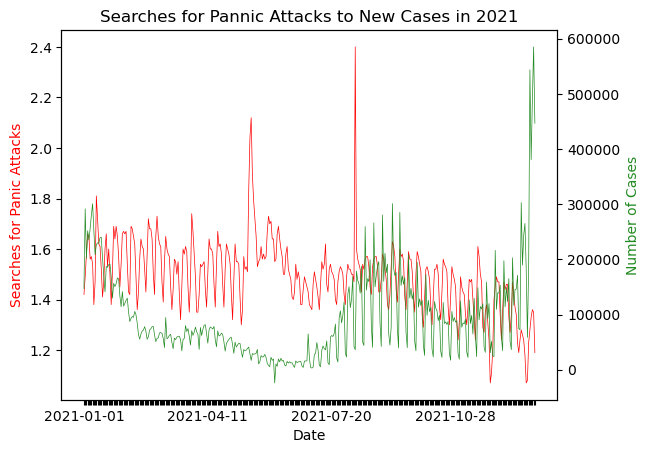

In [165]:
#filter searches for panic attacks to new cases in 2021
x_axis = mental_df_2021['Date']
y_axisa = mental_df_2021['Searches for Panic Attacks']
y_axisc = mental_df_2021['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 100
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]



ax.set_xlabel("Date")
ax.set_ylabel("Searches for Panic Attacks", color = 'red')
ax2.set_ylabel('Number of Cases', color = 'forestgreen')
plt.title('Searches for Pannic Attacks to New Cases in 2021')
plt.savefig("Panic2021.jpg")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

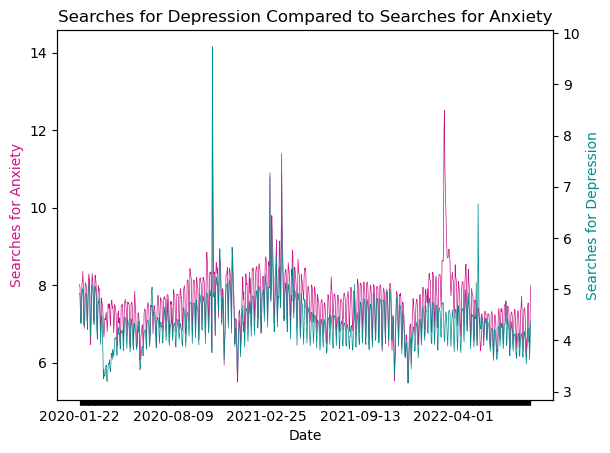

In [168]:
#Compare searches for depression to searches for anxiety 

x_axis = mental_df['Date']
y_axisa = mental_df['Searches for Anxiety']
y_axisc = mental_df['Searches for Depression']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'darkcyan', linewidth = 0.5)

n = 200 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('Searches for Depression', color = 'darkcyan')
plt.title('Searches for Depression Compared to Searches for Anxiety')
plt.savefig("AnxietyDepression.jpg")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

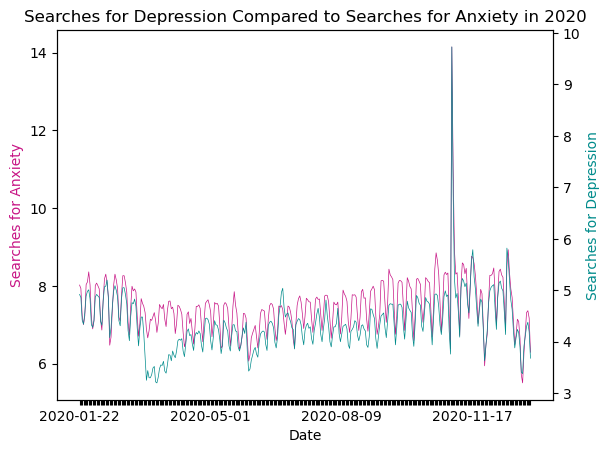

In [169]:
x_axis = mental_df_2020['Date']
y_axisa = mental_df_2020['Searches for Anxiety']
y_axisc = mental_df_2020['Searches for Depression']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'darkcyan', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('Searches for Depression', color = 'darkcyan')
plt.title('Searches for Depression Compared to Searches for Anxiety in 2020')
plt.savefig("AnxietyDepression2020.jpg")
plt.show


AttributeError: module 'matplotlib.pyplot' has no attribute 'figsave'

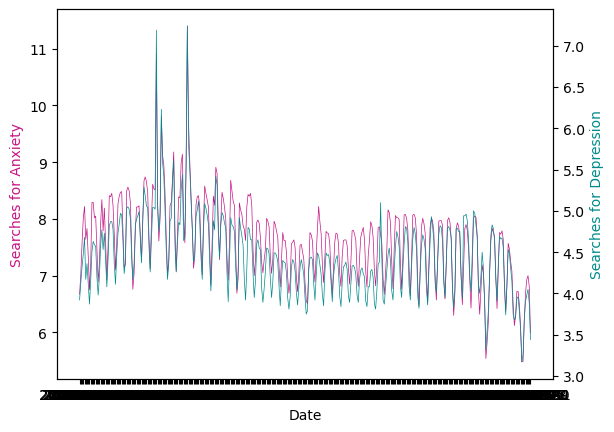

In [170]:
x_axis = mental_df_2021['Date']
y_axisa = mental_df_2021['Searches for Anxiety']
y_axisc = mental_df_2021['Searches for Depression']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'darkcyan', linewidth = 0.5)

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('Searches for Depression', color = 'darkcyan')
plt.figsave("AnxietyDepression2021.jpg")
plt.title('Searches for Depression Compared to Searches for Anxiety in 2021')

The Correlation between Anxiety and Depression is 0.79


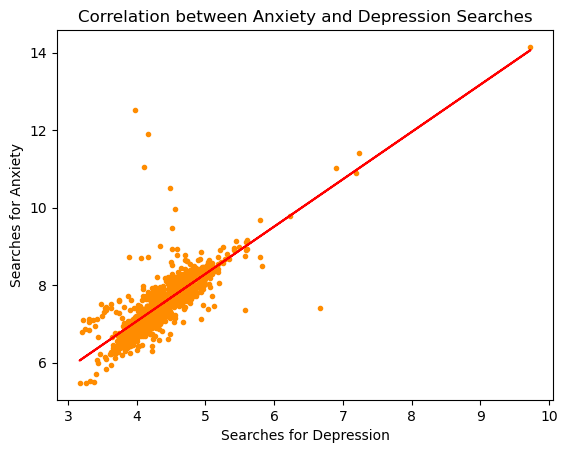

In [171]:
#Determine correlation between searches for anxiety and searches for depression 
from sklearn import datasets
from scipy.stats import linregress

x_axis = mental_df['Searches for Depression']
y_axis = mental_df['Searches for Anxiety']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept 
plt.scatter(x_axis, y_axis, marker = '.', facecolors = 'darkorange', edgecolors = 'darkorange')
plt.plot(x_axis, regress_values, "r-")
plt.xlabel('Searches for Depression')
plt.ylabel('Searches for Anxiety')
plt.title('Correlation between Anxiety and Depression Searches')
correlation = st.pearsonr(x_axis, y_axis)
plt.savefig('AnxDepcor.jpg')
plt.show 
print(f"The Correlation between Anxiety and Depression is {round(correlation[0],2)}")

In [81]:
mean_depression = mental_df['Searches for Depression'].mean()
mean_anxiety = mental_df['Searches for Anxiety'].mean()
print(f" Average searches for Depression: {mean_depression}")
print(f" Average searches for Anxiety: {mean_anxiety}")

 Average searches for Depression: 4.363326424870467
 Average searches for Anxiety: 7.514580310880829


In [83]:
mean_depression_2020 = mental_df_2020['Searches for Depression'].mean()
mean_anxiety_2020 = mental_df_2020['Searches for Anxiety'].mean()
print(f" Average searches for Depression in 2020: {mean_depression_2020}")
print(f" Average searches for Anxiety in 2020: {mean_anxiety_2020}")
                        

 Average searches for Depression in 2020: 4.361768115942029
 Average searches for Anxiety in 2020: 7.46495652173913


In [84]:
mean_depression_2021 = mental_df_2021['Searches for Depression'].mean()
mean_anxiety_2021 = mental_df_2021['Searches for Anxiety'].mean()
print(f" Average searches for Depression in 2021: {mean_depression_2021}")
print(f" Average searches for Anxiety in 2021: {mean_anxiety_2021}")

 Average searches for Depression in 2021: 4.45227397260274
 Average searches for Anxiety in 2021: 7.60095890410959


In [98]:

data = {'Search': ['Overall Depression', 'Overall Anxiety', 
                   'Depression 2020', 'Anxiety 2020', 'Depression 2021', 'Anxiety 2021'],
       'Average Frequency': [mean_depression, mean_anxiety, mean_depression_2020, mean_anxiety_2020,
                             mean_depression_2021,mean_anxiety_2021]}
average_df = pd.DataFrame(data)
average_df



,Search,Average Frequency
0,Overall Depression,4.363326
1,Overall Anxiety,7.514580
2,Depression 2020,4.361768
3,Anxiety 2020,7.464957
4,Depression 2021,4.452274
5,Anxiety 2021,7.600959


<function matplotlib.pyplot.show(close=None, block=None)>

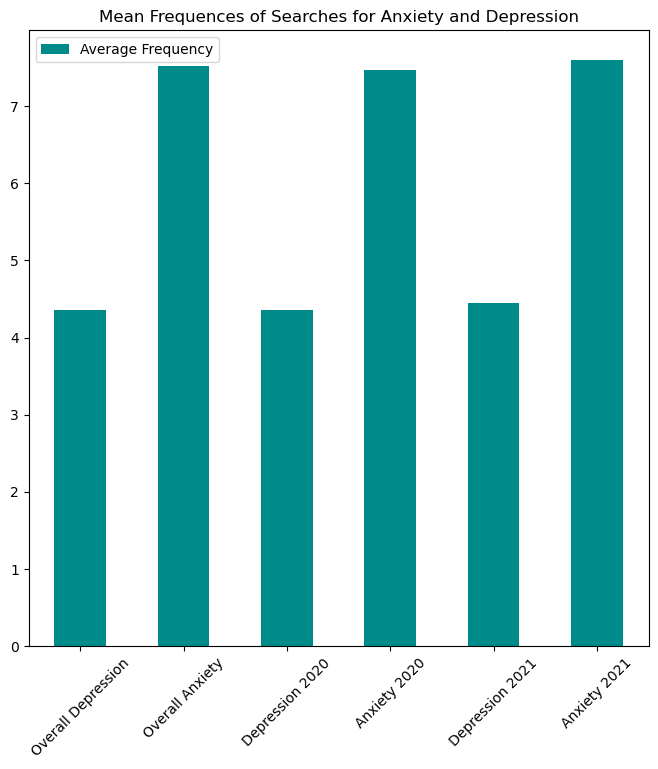

In [172]:
colors = ['darkcyan', 'mediumvioletred', 'blue', 'red', 'green', 'black']
ax = average_df.plot(kind = 'bar', figsize = (8,8), color = colors, rot=0)
ax.set_xticklabels(average_df['Search'], rotation =45)
plt.title('Mean Frequences of Searches for Anxiety and Depression')
plt.savefig('meananxdep.jpg')
plt.show